# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

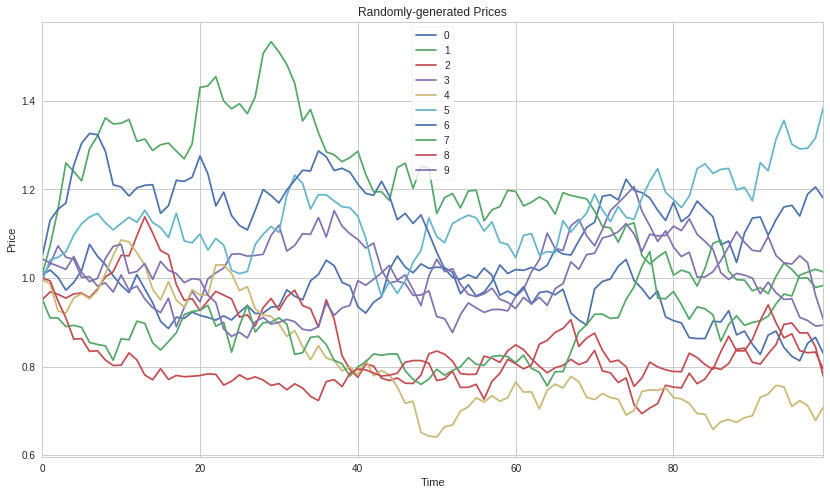

In [3]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

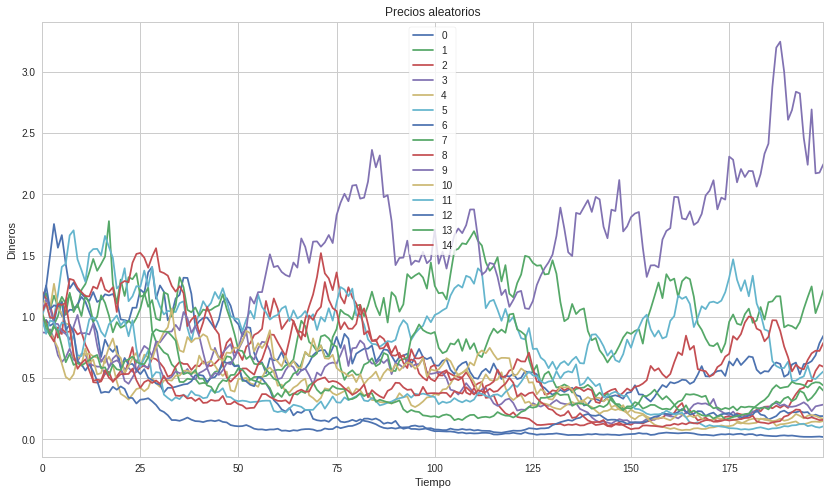

In [4]:
returns = pd.DataFrame(np.random.normal(1.0, 0.10, (200, 15)))
prices = returns.cumprod()
prices.plot()
plt.title('Precios aleatorios')
plt.xlabel('Tiempo')
plt.ylabel('Dineros')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [5]:
s = pd.Series([1, 2, np.nan, 4, 5])
print s

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [6]:
s = pd.Series([1, 22, 33, 55])
print s

0     1
1    22
2    33
3    55
dtype: int64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [7]:
print s.name

None


In [8]:
print s.name, 'nombre'

None nombre


This name can be directly modified with no repercussions.

In [9]:
s.name = "Toy Series"
print s.name

Toy Series


In [10]:
s.name = "MI NOMBRE"
print s.name,'John wick'

MI NOMBRE John wick


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [11]:
print s.index

RangeIndex(start=0, stop=4, step=1)


In [12]:
print s.index

RangeIndex(start=0, stop=4, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [13]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04'], dtype='datetime64[ns]', freq='D')


In [14]:
new_index = pd.date_range("2018-02-02", periods=len(s), freq="D")
print new_index

DatetimeIndex(['2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05'], dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [15]:
s.index = new_index
print s.index

DatetimeIndex(['2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05'], dtype='datetime64[ns]', freq='D')


In [16]:
s.index = new_index
print s.index

DatetimeIndex(['2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05'], dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [17]:
print "First element of the series: ", s.iloc[0]
print "Last element of the series: ", s.iloc[len(s)-1]

First element of the series:  1
Last element of the series:  55


In [18]:
print "Segundo elemento es: ", s.iloc[1]
print "Antepenultimo elementos: ", s.iloc[len(s)-2]

Segundo elemento es:  22
Antepenultimo elementos:  33


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [19]:
s.iloc[:2]

2018-02-02     1
2018-02-03    22
Freq: D, Name: MI NOMBRE, dtype: int64

In [20]:
s.iloc[:3]

2018-02-02     1
2018-02-03    22
2018-02-04    33
Freq: D, Name: MI NOMBRE, dtype: int64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [21]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2018-02-02     1
2018-02-03    22
2018-02-04    33
Freq: D, Name: MI NOMBRE, dtype: int64

In [22]:
start = 1
end = len(s) - 2
step = 3

s.iloc[start:end:step]

2018-02-03    22
Freq: 3D, Name: MI NOMBRE, dtype: int64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [23]:
s.iloc[::-1]

2018-02-05    55
2018-02-04    33
2018-02-03    22
2018-02-02     1
Freq: -1D, Name: MI NOMBRE, dtype: int64

In [24]:
s.iloc[:-1]

2018-02-02     1
2018-02-03    22
2018-02-04    33
Freq: D, Name: MI NOMBRE, dtype: int64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [25]:
s.iloc[-2:-4:-1]

2018-02-04    33
2018-02-03    22
Freq: -1D, Name: MI NOMBRE, dtype: int64

In [26]:
s.iloc[-1:0:-1]

2018-02-05    55
2018-02-04    33
2018-02-03    22
Freq: -1D, Name: MI NOMBRE, dtype: int64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [27]:
s.loc['2018-02-05']

55

In [28]:
s.loc['2018-02-02']

1

Or even for a range of dates!

In [29]:
s.loc['2016-01-02':'2016-01-04']

Series([], Freq: D, Name: MI NOMBRE, dtype: int64)

In [30]:
s.loc['2018-02-02':'2019-02-02']

2018-02-02     1
2018-02-03    22
2018-02-04    33
2018-02-05    55
Freq: D, Name: MI NOMBRE, dtype: int64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [31]:
print s < 3

2018-02-02     True
2018-02-03    False
2018-02-04    False
2018-02-05    False
Freq: D, Name: MI NOMBRE, dtype: bool


In [32]:
print s < 2
print s == 1

2018-02-02     True
2018-02-03    False
2018-02-04    False
2018-02-05    False
Freq: D, Name: MI NOMBRE, dtype: bool
2018-02-02     True
2018-02-03    False
2018-02-04    False
2018-02-05    False
Freq: D, Name: MI NOMBRE, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [33]:
print s.loc[s < 3]

2018-02-02    1
Freq: D, Name: MI NOMBRE, dtype: int64


In [34]:
print s.loc[s <= 3]

2018-02-02    1
Freq: D, Name: MI NOMBRE, dtype: int64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [35]:
print s.loc[(s < 3) & (s > 1)]

Series([], Freq: D, Name: MI NOMBRE, dtype: int64)


In [36]:
print s.loc[(s <= 3) & (s >= 1)]

2018-02-02    1
Freq: D, Name: MI NOMBRE, dtype: int64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [37]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

In [38]:
symbol = "TSLA"
start = "2015-01-01"
end = "2019-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [39]:
print "\n", type(prices)
prices.head(5) 


 <class 'pandas.core.series.Series'>


2015-01-02 00:00:00+00:00    219.19
2015-01-05 00:00:00+00:00    210.01
2015-01-06 00:00:00+00:00    211.19
2015-01-07 00:00:00+00:00    210.81
2015-01-08 00:00:00+00:00    210.55
Freq: C, Name: Equity(39840 [TSLA]), dtype: float64

In [40]:
print "\n", type(prices)
prices.head(100) 


 <class 'pandas.core.series.Series'>


2015-01-02 00:00:00+00:00    219.190
2015-01-05 00:00:00+00:00    210.010
2015-01-06 00:00:00+00:00    211.190
2015-01-07 00:00:00+00:00    210.810
2015-01-08 00:00:00+00:00    210.550
2015-01-09 00:00:00+00:00    206.600
2015-01-12 00:00:00+00:00    202.210
2015-01-13 00:00:00+00:00    204.300
2015-01-14 00:00:00+00:00    192.590
2015-01-15 00:00:00+00:00    191.740
2015-01-16 00:00:00+00:00    193.020
2015-01-20 00:00:00+00:00    191.890
2015-01-21 00:00:00+00:00    196.560
2015-01-22 00:00:00+00:00    201.650
2015-01-23 00:00:00+00:00    201.290
2015-01-26 00:00:00+00:00    206.550
2015-01-27 00:00:00+00:00    206.030
2015-01-28 00:00:00+00:00    199.225
2015-01-29 00:00:00+00:00    205.158
2015-01-30 00:00:00+00:00    203.600
2015-02-02 00:00:00+00:00    211.010
2015-02-03 00:00:00+00:00    218.360
2015-02-04 00:00:00+00:00    218.540
2015-02-05 00:00:00+00:00    220.960
2015-02-06 00:00:00+00:00    217.460
2015-02-09 00:00:00+00:00    217.470
2015-02-10 00:00:00+00:00    216.280
2

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [41]:
print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name

Old name:  Equity(39840 [TSLA])
New name:  TSLA


In [42]:
print 'ANTIGUO: ', prices.name
prices.name = 'Wick parabelloso'
print 'NUEVO: ', prices.name

ANTIGUO:  TSLA
NUEVO:  Wick parabelloso


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [43]:
print prices.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


In [44]:
print prices.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [45]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  


2015-01-31 00:00:00+00:00    203.208150
2015-02-28 00:00:00+00:00    210.670053
2015-03-31 00:00:00+00:00    194.721909
2015-04-30 00:00:00+00:00    211.610714
2015-05-31 00:00:00+00:00    242.208000
2015-06-30 00:00:00+00:00    256.998773
2015-07-31 00:00:00+00:00    266.568773
2015-08-31 00:00:00+00:00    244.552714
2015-09-30 00:00:00+00:00    252.886190
2015-10-31 00:00:00+00:00    221.972818
Freq: M, Name: Wick parabelloso, dtype: float64

In [46]:
monthly_prices = prices.resample('M')
monthly_prices.head(100)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  


2015-01-31 00:00:00+00:00    203.208150
2015-02-28 00:00:00+00:00    210.670053
2015-03-31 00:00:00+00:00    194.721909
2015-04-30 00:00:00+00:00    211.610714
2015-05-31 00:00:00+00:00    242.208000
2015-06-30 00:00:00+00:00    256.998773
2015-07-31 00:00:00+00:00    266.568773
2015-08-31 00:00:00+00:00    244.552714
2015-09-30 00:00:00+00:00    252.886190
2015-10-31 00:00:00+00:00    221.972818
2015-11-30 00:00:00+00:00    220.870300
2015-12-31 00:00:00+00:00    230.151682
2016-01-31 00:00:00+00:00    204.571579
2016-02-29 00:00:00+00:00    169.674700
2016-03-31 00:00:00+00:00    216.076636
2016-04-30 00:00:00+00:00    250.945238
2016-05-31 00:00:00+00:00    216.611429
2016-06-30 00:00:00+00:00    214.841591
2016-07-31 00:00:00+00:00    223.333200
2016-08-31 00:00:00+00:00    223.694783
2016-09-30 00:00:00+00:00    202.241714
2016-10-31 00:00:00+00:00    201.690571
2016-11-30 00:00:00+00:00    189.172857
2016-12-31 00:00:00+00:00    200.539905
2017-01-31 00:00:00+00:00    239.312000


The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [47]:
monthly_prices_med = prices.resample('H', how='median')
monthly_prices_med.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2015-01-02 00:00:00+00:00    219.19
2015-01-02 01:00:00+00:00       NaN
2015-01-02 02:00:00+00:00       NaN
2015-01-02 03:00:00+00:00       NaN
2015-01-02 04:00:00+00:00       NaN
2015-01-02 05:00:00+00:00       NaN
2015-01-02 06:00:00+00:00       NaN
2015-01-02 07:00:00+00:00       NaN
2015-01-02 08:00:00+00:00       NaN
2015-01-02 09:00:00+00:00       NaN
Freq: H, Name: Wick parabelloso, dtype: float64

In [48]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(100)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2015-01-31 00:00:00+00:00    203.9500
2015-02-28 00:00:00+00:00    211.0100
2015-03-31 00:00:00+00:00    194.5150
2015-04-30 00:00:00+00:00    209.4100
2015-05-31 00:00:00+00:00    244.5400
2015-06-30 00:00:00+00:00    256.2775
2015-07-31 00:00:00+00:00    266.4000
2015-08-31 00:00:00+00:00    242.9900
2015-09-30 00:00:00+00:00    250.2000
2015-10-31 00:00:00+00:00    218.0700
2015-11-30 00:00:00+00:00    219.4900
2015-12-31 00:00:00+00:00    230.4950
2016-01-31 00:00:00+00:00    204.7100
2016-02-29 00:00:00+00:00    171.1475
2016-03-31 00:00:00+00:00    220.1300
2016-04-30 00:00:00+00:00    251.4100
2016-05-31 00:00:00+00:00    215.1200
2016-06-30 00:00:00+00:00    217.8950
2016-07-31 00:00:00+00:00    223.6000
2016-08-31 00:00:00+00:00    224.9000
2016-09-30 00:00:00+00:00    202.8200
2016-10-31 00:00:00+00:00    200.9200
2016-11-30 00:00:00+00:00    189.3000
2016-12-31 00:00:00+00:00    198.6900
2017-01-31 00:00:00+00:00    238.0500
2017-02-28 00:00:00+00:00    261.9800
2017-03-31 0

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [49]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


2015-01-31 00:00:00+00:00    219.19
2015-02-28 00:00:00+00:00    211.01
2015-03-31 00:00:00+00:00    197.47
2015-04-30 00:00:00+00:00    187.51
2015-05-31 00:00:00+00:00    225.96
2015-06-30 00:00:00+00:00    249.28
2015-07-31 00:00:00+00:00    268.96
2015-08-31 00:00:00+00:00    259.81
2015-09-30 00:00:00+00:00    238.64
2015-10-31 00:00:00+00:00    239.81
Freq: M, Name: Wick parabelloso, dtype: float64

In [50]:
def casi_custom_resampler(array_like):
    return array_like[1]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(15)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


2015-01-31 00:00:00+00:00    219.190
2015-02-28 00:00:00+00:00    211.010
2015-03-31 00:00:00+00:00    197.470
2015-04-30 00:00:00+00:00    187.510
2015-05-31 00:00:00+00:00    225.960
2015-06-30 00:00:00+00:00    249.280
2015-07-31 00:00:00+00:00    268.960
2015-08-31 00:00:00+00:00    259.810
2015-09-30 00:00:00+00:00    238.640
2015-10-31 00:00:00+00:00    239.810
2015-11-30 00:00:00+00:00    213.810
2015-12-31 00:00:00+00:00    237.244
2016-01-31 00:00:00+00:00    223.410
2016-02-29 00:00:00+00:00    196.950
2016-03-31 00:00:00+00:00    186.340
Freq: M, Name: Wick parabelloso, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [51]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

2015-01-01 19:00:00-05:00    219.19
2015-01-04 19:00:00-05:00    210.01
2015-01-05 19:00:00-05:00    211.19
2015-01-06 19:00:00-05:00    210.81
2015-01-07 19:00:00-05:00    210.55
2015-01-08 19:00:00-05:00    206.60
2015-01-11 19:00:00-05:00    202.21
2015-01-12 19:00:00-05:00    204.30
2015-01-13 19:00:00-05:00    192.59
2015-01-14 19:00:00-05:00    191.74
Freq: C, Name: Wick parabelloso, dtype: float64

In [52]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(100)

2015-01-01 19:00:00-05:00    219.190
2015-01-04 19:00:00-05:00    210.010
2015-01-05 19:00:00-05:00    211.190
2015-01-06 19:00:00-05:00    210.810
2015-01-07 19:00:00-05:00    210.550
2015-01-08 19:00:00-05:00    206.600
2015-01-11 19:00:00-05:00    202.210
2015-01-12 19:00:00-05:00    204.300
2015-01-13 19:00:00-05:00    192.590
2015-01-14 19:00:00-05:00    191.740
2015-01-15 19:00:00-05:00    193.020
2015-01-19 19:00:00-05:00    191.890
2015-01-20 19:00:00-05:00    196.560
2015-01-21 19:00:00-05:00    201.650
2015-01-22 19:00:00-05:00    201.290
2015-01-25 19:00:00-05:00    206.550
2015-01-26 19:00:00-05:00    206.030
2015-01-27 19:00:00-05:00    199.225
2015-01-28 19:00:00-05:00    205.158
2015-01-29 19:00:00-05:00    203.600
2015-02-01 19:00:00-05:00    211.010
2015-02-02 19:00:00-05:00    218.360
2015-02-03 19:00:00-05:00    218.540
2015-02-04 19:00:00-05:00    220.960
2015-02-05 19:00:00-05:00    217.460
2015-02-08 19:00:00-05:00    217.470
2015-02-09 19:00:00-05:00    216.280
2

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [53]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [54]:
calendar_dates = pd.date_range(start=start, end=end, freq='M', tz='UTC')
print calendar_dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns, UTC]', freq='M')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [55]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2015-01-31 00:00:00+00:00    203.600
2015-02-28 00:00:00+00:00    203.300
2015-03-31 00:00:00+00:00    188.820
2015-04-30 00:00:00+00:00    226.060
2015-05-31 00:00:00+00:00    250.690
2015-06-30 00:00:00+00:00    268.450
2015-07-31 00:00:00+00:00    266.140
2015-08-31 00:00:00+00:00    249.110
2015-09-30 00:00:00+00:00    248.400
2015-10-31 00:00:00+00:00    206.940
2015-11-30 00:00:00+00:00    230.375
2015-12-31 00:00:00+00:00    240.000
2016-01-31 00:00:00+00:00    191.110
2016-02-29 00:00:00+00:00    191.910
2016-03-31 00:00:00+00:00    229.700
Freq: M, Name: Wick parabelloso, dtype: float64

In [56]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(100)

2015-01-31 00:00:00+00:00    203.600
2015-02-28 00:00:00+00:00    203.300
2015-03-31 00:00:00+00:00    188.820
2015-04-30 00:00:00+00:00    226.060
2015-05-31 00:00:00+00:00    250.690
2015-06-30 00:00:00+00:00    268.450
2015-07-31 00:00:00+00:00    266.140
2015-08-31 00:00:00+00:00    249.110
2015-09-30 00:00:00+00:00    248.400
2015-10-31 00:00:00+00:00    206.940
2015-11-30 00:00:00+00:00    230.375
2015-12-31 00:00:00+00:00    240.000
2016-01-31 00:00:00+00:00    191.110
2016-02-29 00:00:00+00:00    191.910
2016-03-31 00:00:00+00:00    229.700
2016-04-30 00:00:00+00:00    240.740
2016-05-31 00:00:00+00:00    223.140
2016-06-30 00:00:00+00:00    212.270
2016-07-31 00:00:00+00:00    234.725
2016-08-31 00:00:00+00:00    211.950
2016-09-30 00:00:00+00:00    204.010
2016-10-31 00:00:00+00:00    197.730
2016-11-30 00:00:00+00:00    189.300
2016-12-31 00:00:00+00:00    213.720
2017-01-31 00:00:00+00:00    251.990
2017-02-28 00:00:00+00:00    249.990
2017-03-31 00:00:00+00:00    278.310
2

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [57]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2015-01-31 00:00:00+00:00    203.60
2015-02-28 00:00:00+00:00    203.30
2015-03-31 00:00:00+00:00    188.82
2015-04-30 00:00:00+00:00    226.06
2015-05-31 00:00:00+00:00    250.69
2015-06-30 00:00:00+00:00    268.45
2015-07-31 00:00:00+00:00    266.14
2015-08-31 00:00:00+00:00    249.11
2015-09-30 00:00:00+00:00    248.40
2015-10-31 00:00:00+00:00    206.94
Freq: M, Name: Wick parabelloso, dtype: float64

In [58]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(100)

2015-01-31 00:00:00+00:00    203.600
2015-02-28 00:00:00+00:00    203.300
2015-03-31 00:00:00+00:00    188.820
2015-04-30 00:00:00+00:00    226.060
2015-05-31 00:00:00+00:00    250.690
2015-06-30 00:00:00+00:00    268.450
2015-07-31 00:00:00+00:00    266.140
2015-08-31 00:00:00+00:00    249.110
2015-09-30 00:00:00+00:00    248.400
2015-10-31 00:00:00+00:00    206.940
2015-11-30 00:00:00+00:00    230.375
2015-12-31 00:00:00+00:00    240.000
2016-01-31 00:00:00+00:00    191.110
2016-02-29 00:00:00+00:00    191.910
2016-03-31 00:00:00+00:00    229.700
2016-04-30 00:00:00+00:00    240.740
2016-05-31 00:00:00+00:00    223.140
2016-06-30 00:00:00+00:00    212.270
2016-07-31 00:00:00+00:00    234.725
2016-08-31 00:00:00+00:00    211.950
2016-09-30 00:00:00+00:00    204.010
2016-10-31 00:00:00+00:00    197.730
2016-11-30 00:00:00+00:00    189.300
2016-12-31 00:00:00+00:00    213.720
2017-01-31 00:00:00+00:00    251.990
2017-02-28 00:00:00+00:00    249.990
2017-03-31 00:00:00+00:00    278.310
2

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [59]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2015-01-31 00:00:00+00:00    203.60
2015-02-28 00:00:00+00:00    203.30
2015-03-31 00:00:00+00:00    188.82
2015-04-30 00:00:00+00:00    226.06
2015-05-31 00:00:00+00:00    250.69
2015-06-30 00:00:00+00:00    268.45
2015-07-31 00:00:00+00:00    266.14
2015-08-31 00:00:00+00:00    249.11
2015-09-30 00:00:00+00:00    248.40
2015-10-31 00:00:00+00:00    206.94
Freq: M, Name: Wick parabelloso, dtype: float64

In [60]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(100)

2015-01-31 00:00:00+00:00    203.600
2015-02-28 00:00:00+00:00    203.300
2015-03-31 00:00:00+00:00    188.820
2015-04-30 00:00:00+00:00    226.060
2015-05-31 00:00:00+00:00    250.690
2015-06-30 00:00:00+00:00    268.450
2015-07-31 00:00:00+00:00    266.140
2015-08-31 00:00:00+00:00    249.110
2015-09-30 00:00:00+00:00    248.400
2015-10-31 00:00:00+00:00    206.940
2015-11-30 00:00:00+00:00    230.375
2015-12-31 00:00:00+00:00    240.000
2016-01-31 00:00:00+00:00    191.110
2016-02-29 00:00:00+00:00    191.910
2016-03-31 00:00:00+00:00    229.700
2016-04-30 00:00:00+00:00    240.740
2016-05-31 00:00:00+00:00    223.140
2016-06-30 00:00:00+00:00    212.270
2016-07-31 00:00:00+00:00    234.725
2016-08-31 00:00:00+00:00    211.950
2016-09-30 00:00:00+00:00    204.010
2016-10-31 00:00:00+00:00    197.730
2016-11-30 00:00:00+00:00    189.300
2016-12-31 00:00:00+00:00    213.720
2017-01-31 00:00:00+00:00    251.990
2017-02-28 00:00:00+00:00    249.990
2017-03-31 00:00:00+00:00    278.310
2

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [61]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2015-01-31 00:00:00+00:00    203.60
2015-02-28 00:00:00+00:00    203.30
2015-03-31 00:00:00+00:00    188.82
2015-04-30 00:00:00+00:00    226.06
2015-05-31 00:00:00+00:00    250.69
2015-06-30 00:00:00+00:00    268.45
2015-07-31 00:00:00+00:00    266.14
2015-08-31 00:00:00+00:00    249.11
2015-09-30 00:00:00+00:00    248.40
2015-10-31 00:00:00+00:00    206.94
Freq: M, Name: Wick parabelloso, dtype: float64

In [62]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(100)

2015-01-31 00:00:00+00:00    203.600
2015-02-28 00:00:00+00:00    203.300
2015-03-31 00:00:00+00:00    188.820
2015-04-30 00:00:00+00:00    226.060
2015-05-31 00:00:00+00:00    250.690
2015-06-30 00:00:00+00:00    268.450
2015-07-31 00:00:00+00:00    266.140
2015-08-31 00:00:00+00:00    249.110
2015-09-30 00:00:00+00:00    248.400
2015-10-31 00:00:00+00:00    206.940
2015-11-30 00:00:00+00:00    230.375
2015-12-31 00:00:00+00:00    240.000
2016-01-31 00:00:00+00:00    191.110
2016-02-29 00:00:00+00:00    191.910
2016-03-31 00:00:00+00:00    229.700
2016-04-30 00:00:00+00:00    240.740
2016-05-31 00:00:00+00:00    223.140
2016-06-30 00:00:00+00:00    212.270
2016-07-31 00:00:00+00:00    234.725
2016-08-31 00:00:00+00:00    211.950
2016-09-30 00:00:00+00:00    204.010
2016-10-31 00:00:00+00:00    197.730
2016-11-30 00:00:00+00:00    189.300
2016-12-31 00:00:00+00:00    213.720
2017-01-31 00:00:00+00:00    251.990
2017-02-28 00:00:00+00:00    249.990
2017-03-31 00:00:00+00:00    278.310
2

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

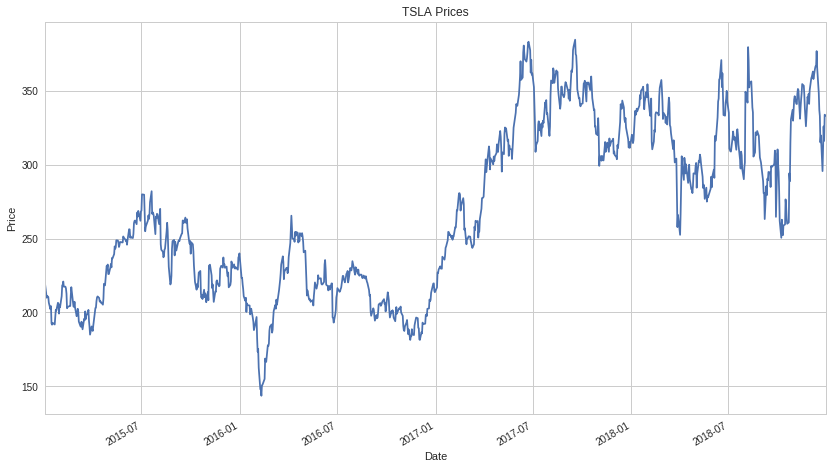

In [63]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

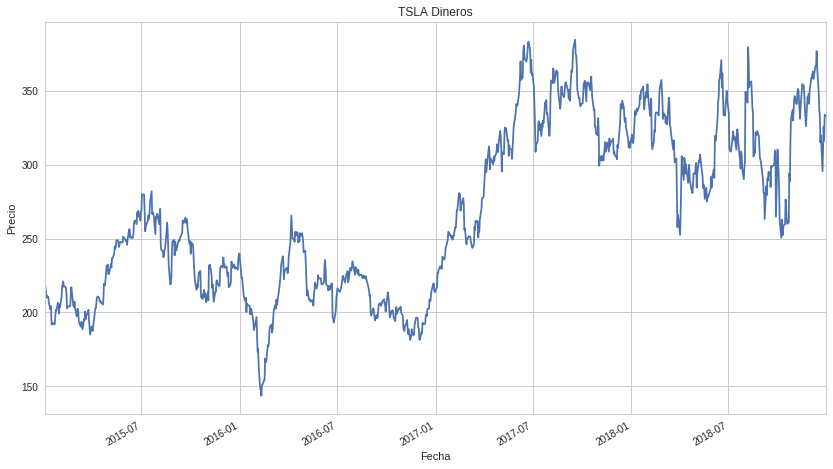

In [64]:
prices.plot();
plt.title(symbol + " Dineros")
plt.ylabel("Precio")
plt.xlabel("Fecha");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [65]:
print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()

Mean:  267.74865805168986
Standard deviation:  56.85420391394927


In [66]:
print "Media: ", prices.mean()
print "Desviacion estandar: ", prices.std()

Media:  267.74865805168986
Desviacion estandar:  56.85420391394927


In [67]:
print "Summary Statistics"
print prices.describe()

Summary Statistics
count    1006.000000
mean      267.748658
std        56.854204
min       143.630000
25%       217.877500
50%       256.940000
75%       317.765000
max       384.610000
Name: Wick parabelloso, dtype: float64


In [68]:
print "Estadisticas"
print prices.describe()

Estadisticas
count    1006.000000
mean      267.748658
std        56.854204
min       143.630000
25%       217.877500
50%       256.940000
75%       317.765000
max       384.610000
Name: Wick parabelloso, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [69]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2015-01-02 00:00:00+00:00    428.38
2015-01-05 00:00:00+00:00    410.02
2015-01-06 00:00:00+00:00    412.38
2015-01-07 00:00:00+00:00    411.62
2015-01-08 00:00:00+00:00    411.10
Freq: C, Name: Wick parabelloso, dtype: float64

In [70]:
modified_prices = prices* 3 - 100
modified_prices.head(15)

2015-01-02 00:00:00+00:00    557.57
2015-01-05 00:00:00+00:00    530.03
2015-01-06 00:00:00+00:00    533.57
2015-01-07 00:00:00+00:00    532.43
2015-01-08 00:00:00+00:00    531.65
2015-01-09 00:00:00+00:00    519.80
2015-01-12 00:00:00+00:00    506.63
2015-01-13 00:00:00+00:00    512.90
2015-01-14 00:00:00+00:00    477.77
2015-01-15 00:00:00+00:00    475.22
2015-01-16 00:00:00+00:00    479.06
2015-01-20 00:00:00+00:00    475.67
2015-01-21 00:00:00+00:00    489.68
2015-01-22 00:00:00+00:00    504.95
2015-01-23 00:00:00+00:00    503.87
Freq: C, Name: Wick parabelloso, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [71]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2015-01-02 00:00:00+00:00    237.378427
2015-01-05 00:00:00+00:00    193.179426
2015-01-06 00:00:00+00:00    228.656318
2015-01-07 00:00:00+00:00    260.535062
2015-01-08 00:00:00+00:00    228.921023
Freq: C, dtype: float64

In [72]:
noisy_prices = prices + 10 * pd.Series(np.random.normal(0, 10, len(prices)), index=prices.index) + 15
noisy_prices.head(100)

2015-01-02 00:00:00+00:00    285.925382
2015-01-05 00:00:00+00:00    279.839135
2015-01-06 00:00:00+00:00    137.939193
2015-01-07 00:00:00+00:00    144.280818
2015-01-08 00:00:00+00:00    391.504287
2015-01-09 00:00:00+00:00    272.606332
2015-01-12 00:00:00+00:00    208.633862
2015-01-13 00:00:00+00:00    116.289793
2015-01-14 00:00:00+00:00    151.821025
2015-01-15 00:00:00+00:00    105.410460
2015-01-16 00:00:00+00:00    114.868562
2015-01-20 00:00:00+00:00    231.947070
2015-01-21 00:00:00+00:00    229.523348
2015-01-22 00:00:00+00:00     12.485954
2015-01-23 00:00:00+00:00    159.929464
2015-01-26 00:00:00+00:00    193.103324
2015-01-27 00:00:00+00:00    211.510936
2015-01-28 00:00:00+00:00    235.936448
2015-01-29 00:00:00+00:00    362.110787
2015-01-30 00:00:00+00:00    240.729571
2015-02-02 00:00:00+00:00    235.114207
2015-02-03 00:00:00+00:00    296.306032
2015-02-04 00:00:00+00:00    392.680967
2015-02-05 00:00:00+00:00    145.511033
2015-02-06 00:00:00+00:00    209.703957


If there are no matching indices, however, we may get an empty `Series` in return.

In [73]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2015-01-02 00:00:00+00:00   NaN
2015-01-05 00:00:00+00:00   NaN
2015-01-06 00:00:00+00:00   NaN
2015-01-07 00:00:00+00:00   NaN
2015-01-08 00:00:00+00:00   NaN
dtype: float64

In [74]:
empty_series = prices + pd.Series(np.random.normal(0.05, 0.08, len(prices)))
print 'Oh no'
empty_series.head(25)


Oh no


2015-01-02 00:00:00+00:00   NaN
2015-01-05 00:00:00+00:00   NaN
2015-01-06 00:00:00+00:00   NaN
2015-01-07 00:00:00+00:00   NaN
2015-01-08 00:00:00+00:00   NaN
2015-01-09 00:00:00+00:00   NaN
2015-01-12 00:00:00+00:00   NaN
2015-01-13 00:00:00+00:00   NaN
2015-01-14 00:00:00+00:00   NaN
2015-01-15 00:00:00+00:00   NaN
2015-01-16 00:00:00+00:00   NaN
2015-01-20 00:00:00+00:00   NaN
2015-01-21 00:00:00+00:00   NaN
2015-01-22 00:00:00+00:00   NaN
2015-01-23 00:00:00+00:00   NaN
2015-01-26 00:00:00+00:00   NaN
2015-01-27 00:00:00+00:00   NaN
2015-01-28 00:00:00+00:00   NaN
2015-01-29 00:00:00+00:00   NaN
2015-01-30 00:00:00+00:00   NaN
2015-02-02 00:00:00+00:00   NaN
2015-02-03 00:00:00+00:00   NaN
2015-02-04 00:00:00+00:00   NaN
2015-02-05 00:00:00+00:00   NaN
2015-02-06 00:00:00+00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [75]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [76]:
add_returns = prices.diff()[1::]
mult_returns = prices.pct_change()[1::-1]

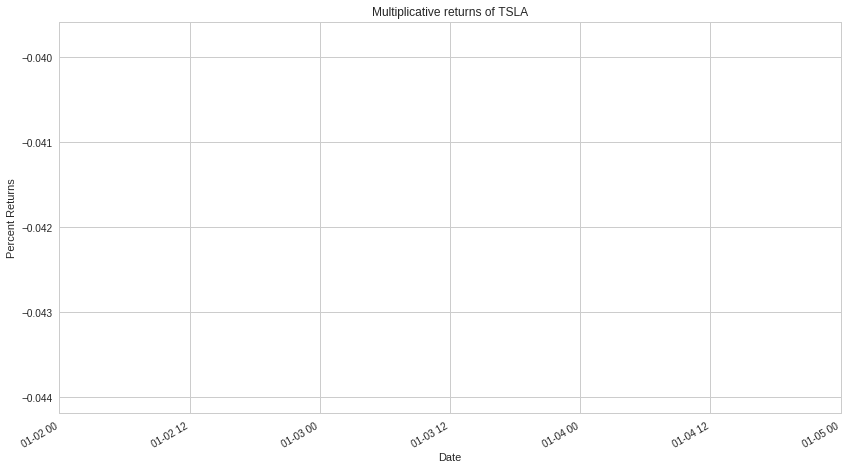

In [77]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

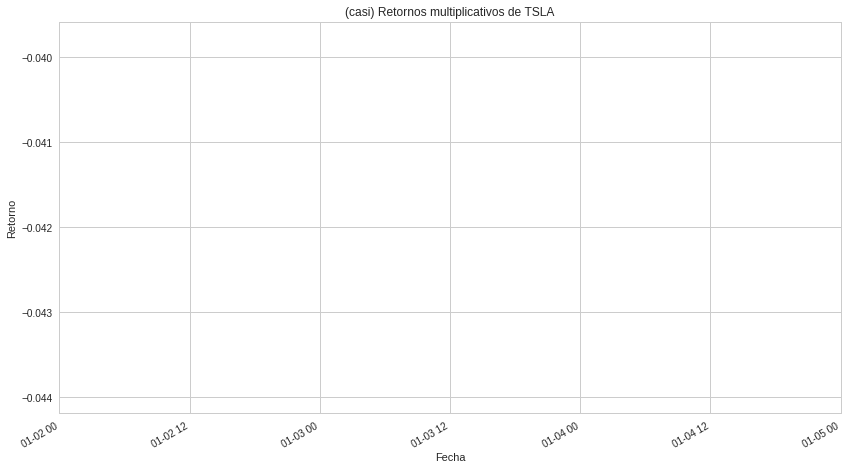

In [78]:
plt.title("(casi) Retornos multiplicativos de " + symbol)
plt.xlabel("Fecha")
plt.ylabel("Retorno")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [79]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


In [80]:
rolling_mean = pd.rolling_mean(prices, 25)
rolling_mean.name = "Media 25 dias atrás"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  """Entry point for launching an IPython kernel.


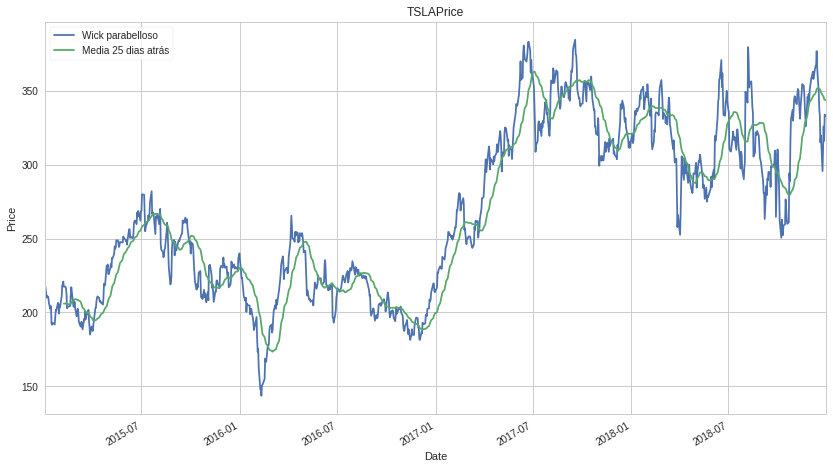

In [81]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

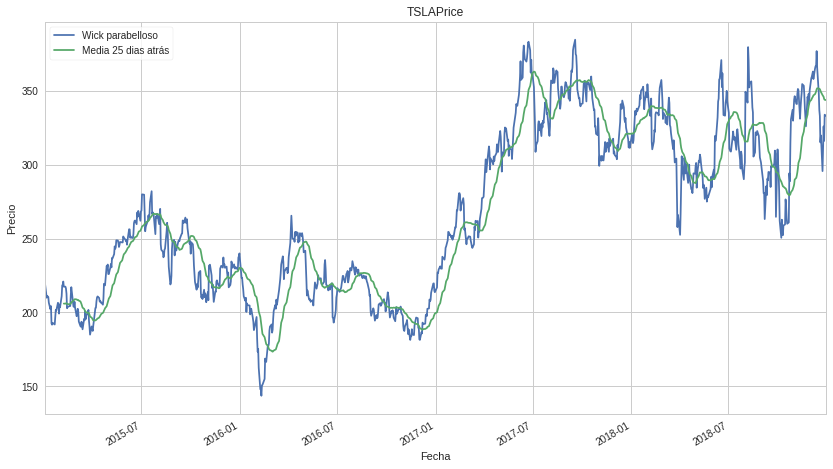

In [82]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend();

In [83]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  """Entry point for launching an IPython kernel.


In [84]:
rolling_std = pd.rolling_std(prices, 25)
rolling_std.name = "25 dias"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).std()
  """Entry point for launching an IPython kernel.


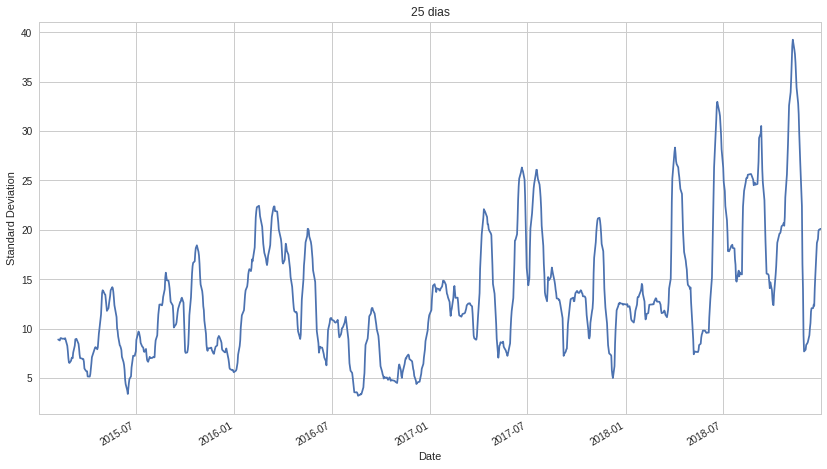

In [85]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

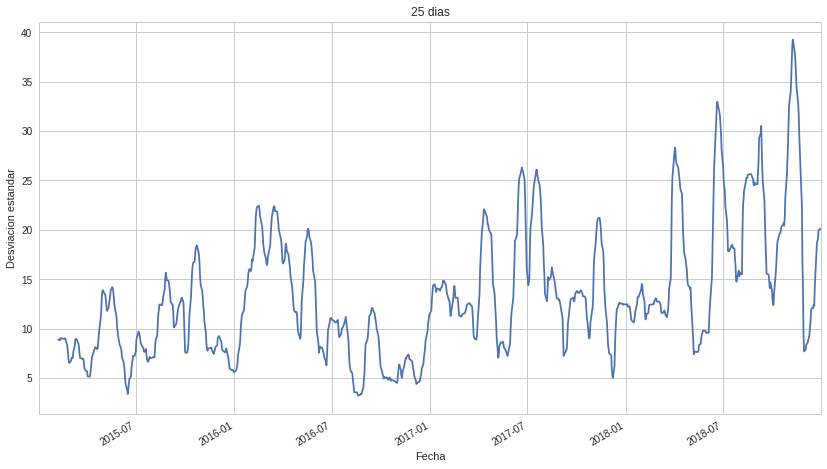

In [86]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Fecha")
plt.ylabel("Desviacion estandar");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [87]:
print np.median(mult_returns)

nan


/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [88]:
print np.median(mult_returns)

nan


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [89]:
print mult_returns.median()

-0.04188147269492226


In [90]:
print mult_returns.median()

-0.04188147269492226


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [91]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

{'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 0.82457959, -2.05201486,  1.92013108, -0.48416898,  0.79076276]), 'a': [1, 2, 3, 4, 5]}


In [92]:
dict_data = {
    'a' : [1, 1, 2, 3, 5,6,7,8,9,10],
    'b' : ['AAAAA', 'BBBBBB', 'D','e','F','G','T','A','YY','QE'],
    'c' : np.random.normal(0.5,0.05 ,10)
}
print dict_data

{'b': ['AAAAA', 'BBBBBB', 'D', 'e', 'F', 'G', 'T', 'A', 'YY', 'QE'], 'c': array([ 0.53071254,  0.48036864,  0.45215901,  0.50297894,  0.48315589,
        0.48754758,  0.52554461,  0.43635162,  0.55335539,  0.47254791]), 'a': [1, 1, 2, 3, 5, 6, 7, 8, 9, 10]}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [93]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=10))
print frame_data

             a       b         c
2016-01-01   1   AAAAA  0.530713
2016-01-02   1  BBBBBB  0.480369
2016-01-03   2       D  0.452159
2016-01-04   3       e  0.502979
2016-01-05   5       F  0.483156
2016-01-06   6       G  0.487548
2016-01-07   7       T  0.525545
2016-01-08   8       A  0.436352
2016-01-09   9      YY  0.553355
2016-01-10  10      QE  0.472548


In [94]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-02', periods=10))
print frame_data

             a       b         c
2016-01-02   1   AAAAA  0.530713
2016-01-03   1  BBBBBB  0.480369
2016-01-04   2       D  0.452159
2016-01-05   3       e  0.502979
2016-01-06   5       F  0.483156
2016-01-07   6       G  0.487548
2016-01-08   7       T  0.525545
2016-01-09   8       A  0.436352
2016-01-10   9      YY  0.553355
2016-01-11  10      QE  0.472548


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [95]:
s_1 = pd.Series([3, 6, 9, 12, 15], name='Tres')
s_2 = pd.Series([5, 10, 15, 20, 25], name="Cinco")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

   Tres  Cinco
0     3      5
1     6     10
2     9     15
3    12     20
4    15     25


In [96]:
s_1 = pd.Series([9, 8, 7, 6, 5], name='Nueve')
s_2 = pd.Series([1, 2, 3, 4, 5], name="Uno")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

   Nueve  Uno
0      9    1
1      8    2
2      7    3
3      6    4
4      5    5


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [97]:
print numbers.columns

Index(['Nueve', 'Uno'], dtype='object')


In [98]:
print numbers.columns

Index(['Nueve', 'Uno'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [99]:
numbers.columns = ['Shmevens', 'Shmodds']
print numbers

   Shmevens  Shmodds
0         9        1
1         8        2
2         7        3
3         6        4
4         5        5


In [100]:
numbers.columns = ['COLUMNA 1', 'COLUMNA 2']
print numbers

   COLUMNA 1  COLUMNA 2
0          9          1
1          8          2
2          7          3
3          6          4
4          5          5


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [101]:
print numbers.index

RangeIndex(start=0, stop=5, step=1)


In [102]:
print numbers.index

RangeIndex(start=0, stop=5, step=1)


In [103]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers

            COLUMNA 1  COLUMNA 2
2016-01-01          9          1
2016-01-02          8          2
2016-01-03          7          3
2016-01-04          6          4
2016-01-05          5          5


In [104]:
numbers.index = pd.date_range("2017-01-01", periods=len(numbers+1))
print numbers


            COLUMNA 1  COLUMNA 2
2017-01-01          9          1
2017-01-02          8          2
2017-01-03          7          3
2017-01-04          6          4
2017-01-05          5          5


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [105]:
numbers.values

array([[9, 1],
       [8, 2],
       [7, 3],
       [6, 4],
       [5, 5]])

In [106]:
print numbers.values

[[9 1]
 [8 2]
 [7 3]
 [6 4]
 [5 5]]


This returns a NumPy array.

In [107]:
type(numbers.values)

<class 'numpy.ndarray'>

In [108]:
print type(numbers.values)
print type(numbers)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [109]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

In [110]:
symbol = ["MSFT", "TSLA", "AAPL", "WFM"]
start = "2015-01-01"
end = "2019-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [111]:
prices.MSFT.head()

2015-01-02 00:00:00+00:00    42.591
2015-01-05 00:00:00+00:00    42.208
2015-01-06 00:00:00+00:00    41.543
2015-01-07 00:00:00+00:00    42.117
2015-01-08 00:00:00+00:00    43.356
Freq: C, Name: MSFT, dtype: float64

In [112]:
prices.AAPL.head()

2015-01-02 00:00:00+00:00    101.936
2015-01-05 00:00:00+00:00     99.092
2015-01-06 00:00:00+00:00     99.073
2015-01-07 00:00:00+00:00    100.490
2015-01-08 00:00:00+00:00    104.333
Freq: C, Name: AAPL, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [113]:
prices.loc[:, 'AAPL'].head()

2015-01-02 00:00:00+00:00    101.936
2015-01-05 00:00:00+00:00     99.092
2015-01-06 00:00:00+00:00     99.073
2015-01-07 00:00:00+00:00    100.490
2015-01-08 00:00:00+00:00    104.333
Freq: C, Name: AAPL, dtype: float64

In [114]:
prices.loc[:, 'MSFT'].head()

2015-01-02 00:00:00+00:00    42.591
2015-01-05 00:00:00+00:00    42.208
2015-01-06 00:00:00+00:00    41.543
2015-01-07 00:00:00+00:00    42.117
2015-01-08 00:00:00+00:00    43.356
Freq: C, Name: MSFT, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [115]:
print type(prices.TSLA)
print type(prices.loc[:, 'TSLA'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [116]:
print type(prices.TSLA)
print type(prices.loc[:, 'TSLA'])
print type(prices.MSFT)
print type(prices.loc[:, 'MSFT'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [117]:
prices.loc[:, ['AAPL', 'MSFT']].head()

,AAPL,MSFT
2015-01-02 00:00:00+00:00,101.936,42.591
2015-01-05 00:00:00+00:00,99.092,42.208
2015-01-06 00:00:00+00:00,99.073,41.543
2015-01-07 00:00:00+00:00,100.490,42.117
2015-01-08 00:00:00+00:00,104.333,43.356


In [118]:
prices.loc[:, ['TSLA', 'MSFT']].head()

,TSLA,MSFT
2015-01-02 00:00:00+00:00,219.19,42.591
2015-01-05 00:00:00+00:00,210.01,42.208
2015-01-06 00:00:00+00:00,211.19,41.543
2015-01-07 00:00:00+00:00,210.81,42.117
2015-01-08 00:00:00+00:00,210.55,43.356


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [119]:
prices.loc['2015-12-15':'2015-12-22']

,MSFT,TSLA,AAPL,WFM
2015-12-15 00:00:00+00:00,51.658,221.09,104.801,31.948
2015-12-16 00:00:00+00:00,52.519,234.51,105.598,32.617
2015-12-17 00:00:00+00:00,52.126,233.34,103.388,32.355
2015-12-18 00:00:00+00:00,50.675,230.31,100.438,31.715
2015-12-21 00:00:00+00:00,51.302,232.56,101.804,31.967
2015-12-22 00:00:00+00:00,51.798,229.94,101.690,33.722


In [120]:
prices.loc['2015-02':'2017-01-02']

,MSFT,TSLA,AAPL,WFM
2015-02-02 00:00:00+00:00,37.607,211.010,110.627,51.007
2015-02-03 00:00:00+00:00,37.890,218.360,110.609,51.257
2015-02-04 00:00:00+00:00,38.108,218.540,111.495,51.506
2015-02-05 00:00:00+00:00,38.664,220.960,112.291,51.228
2015-02-06 00:00:00+00:00,38.646,217.460,111.336,51.372
2015-02-09 00:00:00+00:00,38.582,217.470,112.095,50.806
2015-02-10 00:00:00+00:00,38.810,216.280,114.248,50.883
2015-02-11 00:00:00+00:00,38.600,212.720,116.907,51.348
2015-02-12 00:00:00+00:00,39.247,202.851,118.377,54.040
2015-02-13 00:00:00+00:00,39.958,203.670,118.986,53.886


This plays nicely with lists of columns, too.

In [121]:
prices.loc['2015-12-15':'2015-12-22', ['MSFT', 'WFM']]

,MSFT,WFM
2015-12-15 00:00:00+00:00,51.658,31.948
2015-12-16 00:00:00+00:00,52.519,32.617
2015-12-17 00:00:00+00:00,52.126,32.355
2015-12-18 00:00:00+00:00,50.675,31.715
2015-12-21 00:00:00+00:00,51.302,31.967
2015-12-22 00:00:00+00:00,51.798,33.722


In [122]:
prices.loc['2016-04-03':'2017-02-25', ['TSLA', 'AAPL']]

,TSLA,AAPL
2016-04-04 00:00:00+00:00,246.990,105.980
2016-04-05 00:00:00+00:00,255.610,104.715
2016-04-06 00:00:00+00:00,265.500,105.818
2016-04-07 00:00:00+00:00,257.200,103.501
2016-04-08 00:00:00+00:00,250.070,103.625
2016-04-11 00:00:00+00:00,249.820,103.978
2016-04-12 00:00:00+00:00,247.820,105.322
2016-04-13 00:00:00+00:00,254.530,106.848
2016-04-14 00:00:00+00:00,251.840,106.906
2016-04-15 00:00:00+00:00,254.510,104.760


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [123]:
prices.iloc[0:2, 1]

2015-01-02 00:00:00+00:00    219.19
2015-01-05 00:00:00+00:00    210.01
Freq: C, Name: TSLA, dtype: float64

In [124]:
prices.iloc[1:, 2]

2015-01-05 00:00:00+00:00     99.092
2015-01-06 00:00:00+00:00     99.073
2015-01-07 00:00:00+00:00    100.490
2015-01-08 00:00:00+00:00    104.333
2015-01-09 00:00:00+00:00    104.454
2015-01-12 00:00:00+00:00    101.899
2015-01-13 00:00:00+00:00    102.799
2015-01-14 00:00:00+00:00    102.402
2015-01-15 00:00:00+00:00     99.632
2015-01-16 00:00:00+00:00     98.840
2015-01-20 00:00:00+00:00    101.386
2015-01-21 00:00:00+00:00    102.169
2015-01-22 00:00:00+00:00    104.818
2015-01-23 00:00:00+00:00    105.377
2015-01-26 00:00:00+00:00    105.471
2015-01-27 00:00:00+00:00    101.796
2015-01-28 00:00:00+00:00    107.550
2015-01-29 00:00:00+00:00    110.889
2015-01-30 00:00:00+00:00    109.276
2015-02-02 00:00:00+00:00    110.627
2015-02-03 00:00:00+00:00    110.609
2015-02-04 00:00:00+00:00    111.495
2015-02-05 00:00:00+00:00    112.291
2015-02-06 00:00:00+00:00    111.336
2015-02-09 00:00:00+00:00    112.095
2015-02-10 00:00:00+00:00    114.248
2015-02-11 00:00:00+00:00    116.907
2

In [125]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[range(20, 30, 5), [0, 2]].head(50)

,MSFT,AAPL
2015-02-02 00:00:00+00:00,37.607,110.627
2015-02-09 00:00:00+00:00,38.582,112.095


In [126]:
# Acceder multiplos de 5
# [5, 10, 15, 20, 25, 30]
# Columna 2 o 4
prices.iloc[range(15, 30, 5), [0, 2]].head(50)

,MSFT,AAPL
2015-01-26 00:00:00+00:00,42.864,105.471
2015-02-02 00:00:00+00:00,37.607,110.627
2015-02-09 00:00:00+00:00,38.582,112.095


# Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [127]:
prices.loc[prices.MSFT > prices.WFM].head()

,MSFT,TSLA,AAPL,WFM
2015-05-07 00:00:00+00:00,42.848,236.87,117.762,41.419
2015-05-08 00:00:00+00:00,43.784,236.61,119.972,40.972
2015-05-11 00:00:00+00:00,43.463,239.51,118.768,41.101
2015-05-12 00:00:00+00:00,43.453,244.75,118.336,40.899
2015-05-13 00:00:00+00:00,43.701,243.13,118.467,41.087


In [128]:
prices.loc[prices.TSLA > prices.MSFT].head(25)

,MSFT,TSLA,AAPL,WFM
2015-01-02 00:00:00+00:00,42.591,219.190,101.936,47.993
2015-01-05 00:00:00+00:00,42.208,210.010,99.092,47.672
2015-01-06 00:00:00+00:00,41.543,211.190,99.073,47.337
2015-01-07 00:00:00+00:00,42.117,210.810,100.490,48.017
2015-01-08 00:00:00+00:00,43.356,210.550,104.333,48.467
2015-01-09 00:00:00+00:00,42.991,206.600,104.454,47.816
2015-01-12 00:00:00+00:00,42.463,202.210,101.899,49.596
2015-01-13 00:00:00+00:00,42.231,204.300,102.799,49.520
2015-01-14 00:00:00+00:00,41.880,192.590,102.402,49.357
2015-01-15 00:00:00+00:00,41.434,191.740,99.632,48.541


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [129]:
prices.loc[(prices.MSFT < prices.WFM) & ~prices.AAPL.isnull()].head()

,MSFT,TSLA,AAPL,WFM
2015-01-02 00:00:00+00:00,42.591,219.19,101.936,47.993
2015-01-05 00:00:00+00:00,42.208,210.01,99.092,47.672
2015-01-06 00:00:00+00:00,41.543,211.19,99.073,47.337
2015-01-07 00:00:00+00:00,42.117,210.81,100.490,48.017
2015-01-08 00:00:00+00:00,43.356,210.55,104.333,48.467


In [130]:
prices.loc[(prices.TSLA > prices.MSFT) & (prices.TSLA >= 215) &  (prices.AAPL <= 117)].head(25)

,MSFT,TSLA,AAPL,WFM
2015-01-02 00:00:00+00:00,42.591,219.19,101.936,47.993
2015-02-03 00:00:00+00:00,37.890,218.36,110.609,51.257
2015-02-04 00:00:00+00:00,38.108,218.54,111.495,51.506
2015-02-05 00:00:00+00:00,38.664,220.96,112.291,51.228
2015-02-06 00:00:00+00:00,38.646,217.46,111.336,51.372
2015-02-09 00:00:00+00:00,38.582,217.47,112.095,50.806
2015-02-10 00:00:00+00:00,38.810,216.28,114.248,50.883
2015-07-08 00:00:00+00:00,40.864,254.96,115.262,38.514
2015-07-09 00:00:00+00:00,41.104,257.91,112.854,39.451
2015-07-10 00:00:00+00:00,41.178,259.14,115.891,39.383


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [131]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,MSFT,TSLA,AAPL,WFM
2015-01-02 00:00:00+00:00,42.591,219.19,101.936,47.993
2015-01-05 00:00:00+00:00,42.208,210.01,99.092,47.672
2015-01-06 00:00:00+00:00,41.543,211.19,99.073,47.337
2015-01-07 00:00:00+00:00,42.117,210.81,100.490,48.017
2015-01-08 00:00:00+00:00,43.356,210.55,104.333,48.467


In [132]:
s_1 = get_pricing('MSFT', start_date=start, end_date=end, fields='price')
prices.loc[:, ',MSFT'] = s_1
prices.head(50)

,MSFT,TSLA,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,42.591,219.190,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,42.208,210.010,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,41.543,211.190,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,42.117,210.810,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,43.356,210.550,104.333,48.467,43.356
2015-01-09 00:00:00+00:00,42.991,206.600,104.454,47.816,42.991
2015-01-12 00:00:00+00:00,42.463,202.210,101.899,49.596,42.463
2015-01-13 00:00:00+00:00,42.231,204.300,102.799,49.520,42.231
2015-01-14 00:00:00+00:00,41.880,192.590,102.402,49.357,41.880
2015-01-15 00:00:00+00:00,41.434,191.740,99.632,48.541,41.434


It is also just as easy to remove a column.

In [133]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,MSFT,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,42.591,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,42.208,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,41.543,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,42.117,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,43.356,104.333,48.467,43.356


In [134]:
prices = prices.drop('MSFT', axis=1)
prices.head(50)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356
2015-01-09 00:00:00+00:00,104.454,47.816,42.991
2015-01-12 00:00:00+00:00,101.899,49.596,42.463
2015-01-13 00:00:00+00:00,102.799,49.520,42.231
2015-01-14 00:00:00+00:00,102.402,49.357,41.880
2015-01-15 00:00:00+00:00,99.632,48.541,41.434


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [135]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2015-01-02 00:00:00+00:00,189.658,NaN,42.591,101.936,523.372
2015-01-05 00:00:00+00:00,186.334,NaN,42.208,99.092,512.462
2015-01-06 00:00:00+00:00,184.515,NaN,41.543,99.073,500.236
2015-01-07 00:00:00+00:00,186.823,NaN,42.117,100.490,499.727
2015-01-08 00:00:00+00:00,190.129,NaN,43.356,104.333,501.303


In [136]:
df_1 = get_pricing(['MSFT', 'AAPL'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['TSLA', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(39840 [TSLA]),Equity(46631 [GOOG])
2015-01-02 00:00:00+00:00,42.591,101.936,219.19,523.372
2015-01-05 00:00:00+00:00,42.208,99.092,210.01,512.462
2015-01-06 00:00:00+00:00,41.543,99.073,211.19,500.236
2015-01-07 00:00:00+00:00,42.117,100.490,210.81,499.727
2015-01-08 00:00:00+00:00,43.356,104.333,210.55,501.303


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [137]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356


In [138]:
filled0_prices = prices.fillna(0)
filled0_prices.head(50)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356
2015-01-09 00:00:00+00:00,104.454,47.816,42.991
2015-01-12 00:00:00+00:00,101.899,49.596,42.463
2015-01-13 00:00:00+00:00,102.799,49.520,42.231
2015-01-14 00:00:00+00:00,102.402,49.357,41.880
2015-01-15 00:00:00+00:00,99.632,48.541,41.434


In [139]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356


In [140]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(50)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356
2015-01-09 00:00:00+00:00,104.454,47.816,42.991
2015-01-12 00:00:00+00:00,101.899,49.596,42.463
2015-01-13 00:00:00+00:00,102.799,49.520,42.231
2015-01-14 00:00:00+00:00,102.402,49.357,41.880
2015-01-15 00:00:00+00:00,99.632,48.541,41.434


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [141]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356


In [142]:
dropped_prices = prices.dropna()
dropped_prices.head(50)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,101.936,47.993,42.591
2015-01-05 00:00:00+00:00,99.092,47.672,42.208
2015-01-06 00:00:00+00:00,99.073,47.337,41.543
2015-01-07 00:00:00+00:00,100.490,48.017,42.117
2015-01-08 00:00:00+00:00,104.333,48.467,43.356
2015-01-09 00:00:00+00:00,104.454,47.816,42.991
2015-01-12 00:00:00+00:00,101.899,49.596,42.463
2015-01-13 00:00:00+00:00,102.799,49.520,42.231
2015-01-14 00:00:00+00:00,102.402,49.357,41.880
2015-01-15 00:00:00+00:00,99.632,48.541,41.434


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

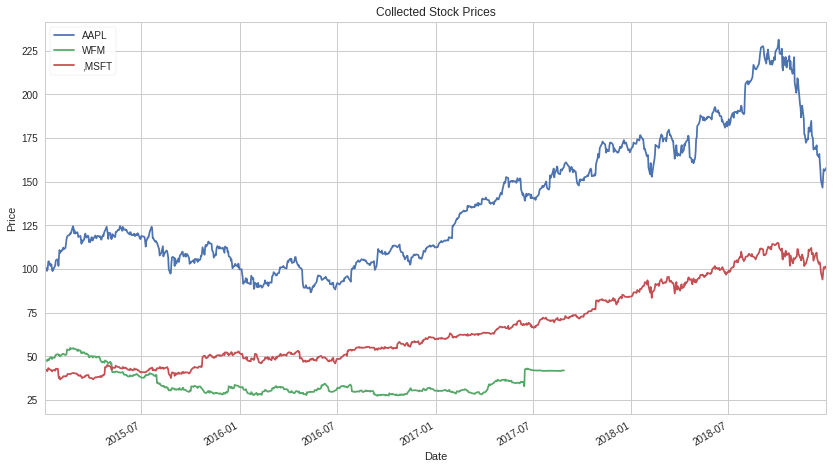

In [143]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

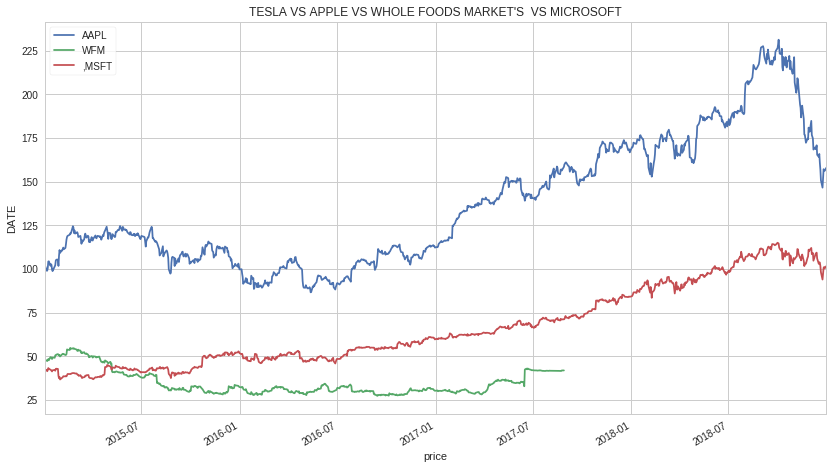

In [144]:
prices.plot()
plt.title("TESLA VS APPLE VS WHOLE FOODS MARKET\'S  VS MICROSOFT")
plt.ylabel("DATE")
plt.xlabel("price");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [145]:
prices.mean(axis=0)

AAPL     137.054148
WFM       35.005616
,MSFT     66.446248
dtype: float64

In [146]:
prices.mean(axis=0)

AAPL     137.054148
WFM       35.005616
,MSFT     66.446248
dtype: float64

As well as the standard deviation:

In [147]:
prices.std(axis=0)

AAPL     36.638602
WFM       7.223258
,MSFT    22.628379
dtype: float64

In [148]:
prices.std(axis=0)

AAPL     36.638602
WFM       7.223258
,MSFT    22.628379
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [149]:
prices.describe()

/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,AAPL,WFM,",MSFT"
count,1006.000000,669.000000,1006.000000
mean,137.054148,35.005616,66.446248
std,36.638602,7.223258,22.628379
min,86.678000,27.495000,36.824000
25%,107.067500,NaN,48.501000
50%,121.795500,NaN,60.253500
75%,166.569500,NaN,84.428250
max,231.263000,54.894000,115.093000


In [150]:
prices.describe()

,AAPL,WFM,",MSFT"
count,1006.000000,669.000000,1006.000000
mean,137.054148,35.005616,66.446248
std,36.638602,7.223258,22.628379
min,86.678000,27.495000,36.824000
25%,107.067500,NaN,48.501000
50%,121.795500,NaN,60.253500
75%,166.569500,NaN,84.428250
max,231.263000,54.894000,115.093000


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [151]:
(2 * prices - 50).head(5)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,153.872,45.986,35.182
2015-01-05 00:00:00+00:00,148.184,45.344,34.416
2015-01-06 00:00:00+00:00,148.146,44.674,33.086
2015-01-07 00:00:00+00:00,150.980,46.034,34.234
2015-01-08 00:00:00+00:00,158.666,46.934,36.712


In [152]:
(3 * prices - 50).head(50)

,AAPL,WFM,",MSFT"
2015-01-02 00:00:00+00:00,255.808,93.979,77.773
2015-01-05 00:00:00+00:00,247.276,93.016,76.624
2015-01-06 00:00:00+00:00,247.219,92.011,74.629
2015-01-07 00:00:00+00:00,251.470,94.051,76.351
2015-01-08 00:00:00+00:00,262.999,95.401,80.068
2015-01-09 00:00:00+00:00,263.362,93.448,78.973
2015-01-12 00:00:00+00:00,255.697,98.788,77.389
2015-01-13 00:00:00+00:00,258.397,98.560,76.693
2015-01-14 00:00:00+00:00,257.206,98.071,75.640
2015-01-15 00:00:00+00:00,248.896,95.623,74.302


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [153]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,AAPL,WFM,",MSFT"
2015-01-05 00:00:00+00:00,-0.027900,-0.006688,-0.008993
2015-01-06 00:00:00+00:00,-0.000192,-0.007027,-0.015755
2015-01-07 00:00:00+00:00,0.014303,0.014365,0.013817
2015-01-08 00:00:00+00:00,0.038243,0.009372,0.029418
2015-01-09 00:00:00+00:00,0.001160,-0.013432,-0.008419


In [154]:
mult_returns = prices.pct_change()[2::2]
mult_returns.head()

,AAPL,WFM,",MSFT"
2015-01-06 00:00:00+00:00,-0.000192,-0.007027,-0.015755
2015-01-08 00:00:00+00:00,0.038243,0.009372,0.029418
2015-01-12 00:00:00+00:00,-0.024461,0.037226,-0.012282
2015-01-14 00:00:00+00:00,-0.003862,-0.003292,-0.008311
2015-01-16 00:00:00+00:00,-0.007949,0.017202,0.016050


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

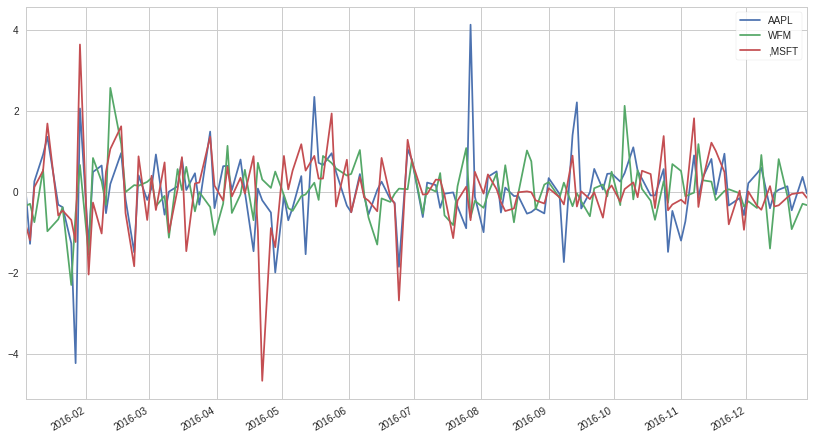

In [155]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2016-01-01':'2017-01-01'].plot();

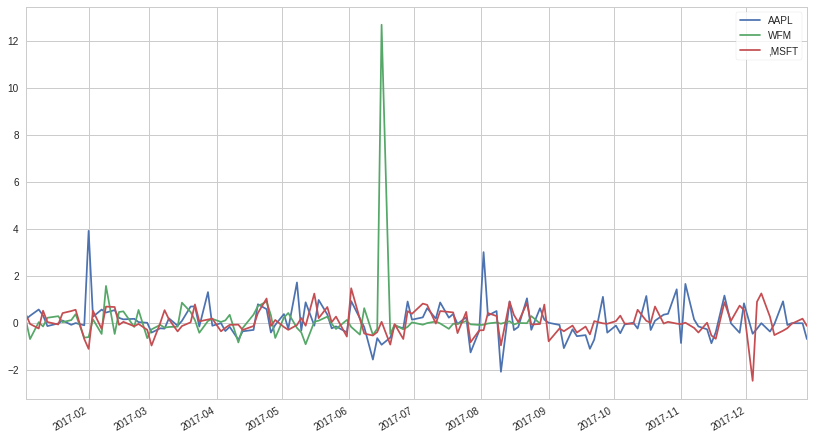

In [156]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2017-01-01':'2018-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [157]:
rolling_mean = pd.rolling_mean(prices, 40)
rolling_mean.columns = prices.columns

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=40,center=False).mean()
  """Entry point for launching an IPython kernel.


In [158]:
rmean = pd.rolling_mean(prices, 10)
rmean.columns = prices.columns

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


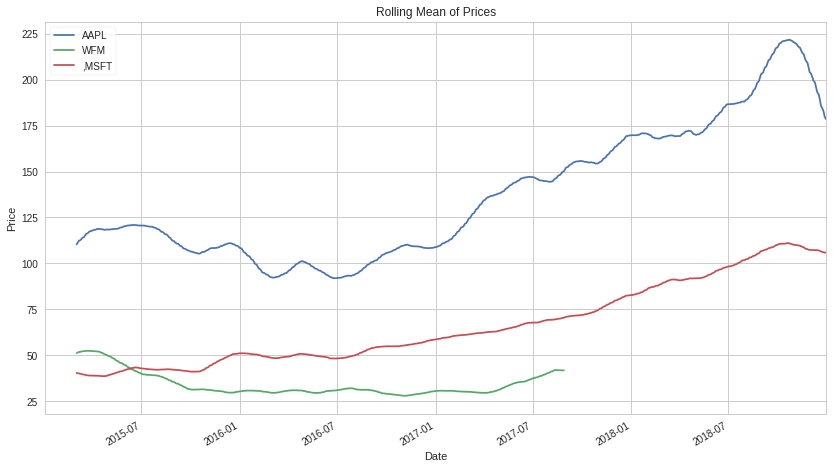

In [159]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

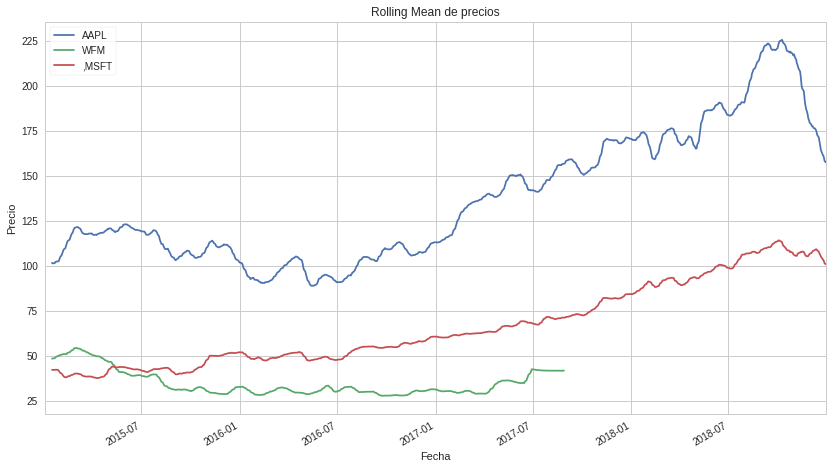

In [160]:
rmean.plot()
plt.title("Rolling Mean de precios")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend();

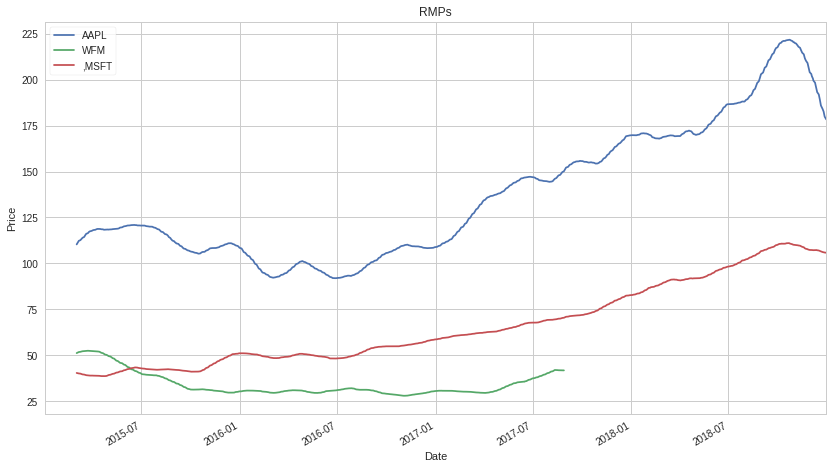

In [161]:
rolling_mean.plot()
plt.title("RMPs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

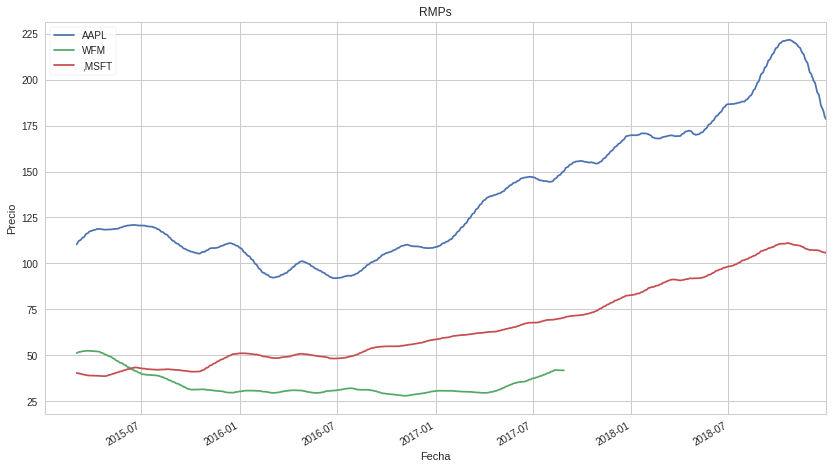

In [162]:
rolling_mean.plot()
plt.title("RMPs")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*